<a href="https://colab.research.google.com/github/hmrizal/biopython/blob/main/tk4_team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Kelompok 4 - Computational Physics and Biology

## Team 1
- 2502049813 – Anugerah Pratama
- 2502058490 – Helmi M. R.
- 2502057304 – Albert Ilham Daniswara
- 2502052341 – Arif Hidayat
- 2502060993 – Muh. Nur Fajar

## Group Task IV : Basic Sequence Analysis and Sequence Alignment

Diberikan 2 sekuens DNA sebagai berikut

generic_dna 1 = ATGATCTCGTAA <br>
generic_dna 2 = ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA

Buat Python NoteBook (.IPYNB) menggunakan Jupyter Notebook atau Google Collab untuk melakuan seluruh langkah analisis sekuens dan pengurutan sekuens menggunakan template yang diberikan dalam tutorial Lab


In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.9 MB/s eta 0:00:00


In [ ]:
import Bio

## 1. Buat sekuens sederhana dari kedua DNA

In [ ]:
from Bio.Seq import Seq

In [ ]:
generic_dna1 = 'ATGATCTCGTAA'
generic_dna2 = 'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA'

In [ ]:
# Simple DNA sequence

seq_1 = Seq(generic_dna1)
seq_2 = Seq(generic_dna2)

print(type(seq_1))
print("Seq 1:", seq_1)

print(type(seq_2))
print("Seq 2:", seq_2)

<class 'Bio.Seq.Seq'>
Seq 1: ATGATCTCGTAA
<class 'Bio.Seq.Seq'>
Seq 2: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA


In [ ]:
print("Seq 1 panjangnya",len(seq_1),"nukleotida")
print("Seq 2 panjangnya",len(seq_2),"nukleotida")

Seq 1 panjangnya 12 nukleotida
Seq 2 panjangnya 39 nukleotida


## 2.	Frekuensi setiap Basa/ Nukeotida pada kedua sekuens

In [ ]:
from collections import Counter

In [ ]:
# Frequency of Nucleotides in each sequence

freq_1 = Counter(seq_1)
freq_2 = Counter(seq_2)

print("Seq 1:", freq_1)
print("Seq 2:", freq_2)

Seq 1: Counter({'A': 4, 'T': 4, 'G': 2, 'C': 2})
Seq 2: Counter({'A': 16, 'C': 10, 'T': 9, 'G': 4})


## 3.	Kandungan GC, kandungan AT, dan titik leleh kedua sekuens DNA

In [ ]:
# kandungan GC

def gc_content(seq):
    result = float(seq.count('G') + seq.count('C'))/len(seq) * 100
    return round(result,2)

In [ ]:
# kandungan AT

def at_content(seq):
    result = float(seq.count('A') + seq.count('T'))/len(seq) * 100
    return round(result,2)

In [ ]:
import Bio.SeqUtils

In [ ]:
from Bio.SeqUtils import MeltingTemp as mt

In [ ]:
def get_metrics(seq):
    gc = gc_content(seq)
    at = at_content(seq)
    melting = round(mt.Tm_GC(seq),2)
    result = print('Kandungan GC: {}% \nKandungan AT: {}% \nTitik Leleh: {}'.format(gc,at,melting))
    return result

In [ ]:
print("Seq 1")
get_metrics(seq_1)

Seq 1
Kandungan GC: 33.33% 
Kandungan AT: 66.67% 
Titik Leleh: 23.57


In [ ]:
print("Seq 2")
get_metrics(seq_2)

Seq 2
Kandungan GC: 35.9% 
Kandungan AT: 64.1% 
Titik Leleh: 59.24


## 4. Berat Molekul

In [ ]:
from Bio.SeqUtils import molecular_weight as mw

In [ ]:
# Berat Molekul

print("Berat Molekul Seq 1:", round(mw(seq_1),2))
print("Berat Molekul Seq 2:", round(mw(seq_2),2))

Berat Molekul Seq 1: 3724.39
Berat Molekul Seq 2: 11975.7


## 5. Local Alignment, Global Alignment, Similarity Percentage

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

/usr/local/lib/python3.8/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
# Global Alignment

alignment = pairwise2.align.globalxx(seq_1,seq_2)

for a in alignment:
  print(format_alignment(*a))

AT----G----AT-C-T-C---G-TAA------------
||    |    || | | |   | |||            
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

A-T---G----AT-C-T-C---G-TAA------------
| |   |    || | | |   | |||            
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

AT-----G---AT-C-T-C---G-TAA------------
||     |   || | | |   | |||            
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

A-T----G---AT-C-T-C---G-TAA------------
| |    |   || | | |   | |||            
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

AT----G----AT--CT-C---G-TAA------------
||    |    ||  || |   | |||            
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

A-T---G----AT--CT-C---G-TAA------------
| |   |    ||  || |   | |||            
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

AT-----G---AT--CT-C---G-TAA------------
||     |   ||  || |   | |||            
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

A-T----G---AT--CT-C---G-TAA------------
| |    |   ||  || |   | |||         

In [ ]:
# Get the global alignment by only the score

alignment2 = pairwise2.align.globalxx(seq_1,seq_2,one_alignment_only=True,score_only=True)
alignment2

12.0

In [ ]:
# Local Alignment

loc_alignment = pairwise2.align.localxx(seq_1,seq_2)

for a in loc_alignment:
  print(format_alignment(*a))

AT----G----AT-C-T-C---G-TA------------A
||    |    || | | |   | ||            |
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

A-T---G----AT-C-T-C---G-TA------------A
| |   |    || | | |   | ||            |
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

AT-----G---AT-C-T-C---G-TA------------A
||     |   || | | |   | ||            |
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

A-T----G---AT-C-T-C---G-TA------------A
| |    |   || | | |   | ||            |
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

AT----G----AT--CT-C---G-TA------------A
||    |    ||  || |   | ||            |
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

A-T---G----AT--CT-C---G-TA------------A
| |   |    ||  || |   | ||            |
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

AT-----G---AT--CT-C---G-TA------------A
||     |   ||  || |   | ||            |
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=12

A-T----G---AT--CT-C---G-TA------------A
| |    |   ||  || |   | ||          

In [ ]:
# Get the local alignment by only the score

loc_alignment2 = pairwise2.align.localxx(seq_1,seq_2,one_alignment_only=True,score_only=True)
loc_alignment2

12.0

In [ ]:
print("Global alignment memiliki",len(alignment),"kemungkinan")
print("Local alignment memiliki",len(loc_alignment),"kemungkinan")

Global alignment memiliki 16 kemungkinan
Local alignment memiliki 16 kemungkinan


#### Check for similarity or percentage of similarity using Alignment
+ fraction of nucleotides that is the same/ total number of nucleotides * 100%

In [ ]:
# similarity percentage of global and local alignment

print("Global Alignment:",round(alignment2/len(seq_2)*100,2),"% similar")
print("Local Alignment:",round(loc_alignment2/len(seq_2)*100,2),"% similar")

Global Alignment: 30.77 % similar
Local Alignment: 30.77 % similar


## 6. Kemungkinan Global Alignment dengan Skor Tertinggi

#### Find out all the possible global alignments with the maximum similarity score
+ Matching characters :2 points, 
+ Each mismatching character: -1 point
+ 0.5 points are deducted when opening a gap, 
+ 0.1 points are deducted when extending it.

In [ ]:
# Global alignment with max sim
glb_alignment = pairwise2.align.globalms(seq_1,seq_2,2,-1,-0.5,-0.1)

for a in glb_alignment:
    print(format_alignment(*a))

AT----G----AT--CT-C----GT------------AA
||    |    ||  || |    ||            ||
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=18.9

AT-----G---AT--CT-C----GT------------AA
||     |   ||  || |    ||            ||
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=18.9

AT----G----AT--C-TC----GT------------AA
||    |    ||  | ||    ||            ||
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=18.9

AT-----G---AT--C-TC----GT------------AA
||     |   ||  | ||    ||            ||
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=18.9

AT----G----AT-C--TC----GT------------AA
||    |    || |  ||    ||            ||
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=18.9

AT-----G---AT-C--TC----GT------------AA
||     |   || |  ||    ||            ||
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=18.9

AT----G----AT--CT--C---GT------------AA
||    |    ||  ||  |   ||            ||
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA
  Score=18.9

AT-----G---AT--CT--C---GT------------AA
||     |   ||  ||  |  

In [ ]:
AvB = pairwise2.align.globalms(seq_1,seq_2,2,-1,-0.5,-0.1,one_alignment_only=True,score_only=True)
BvA = pairwise2.align.globalms(seq_2,seq_1,2,-1,-0.5,-0.1,one_alignment_only=True,score_only=True)

print("Seq A",round(AvB/len(seq_2)*100,2),"% similar with Seq B")

Seq A 48.46 % similar with Seq B


In [ ]:
print("Global alignment memiliki",len(alignment),"kemungkinan")
print("Global Alignment dengan skor tertinggi memiliki",len(glb_alignment),"kemungkinan")

Global alignment memiliki 16 kemungkinan
Global Alignment dengan skor tertinggi memiliki 30 kemungkinan


## 7. Sequence Alignment dengan Dot Plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# dotplot function

def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice


def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()     

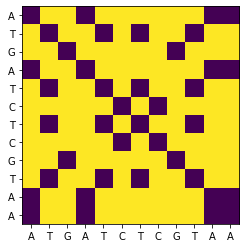

In [ ]:
# Identical show diagonal

dotplotx(seq_1,seq_1)

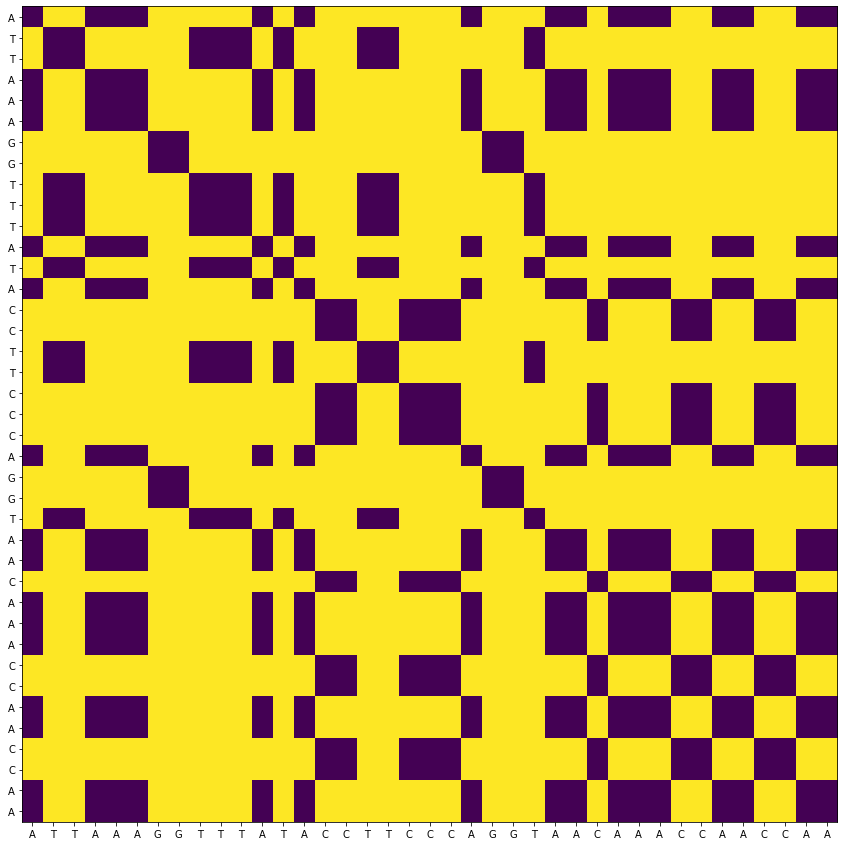

In [ ]:
# Identical show diagonal

plt.figure(figsize=(15, 15))
dotplotx(seq_2,seq_2)

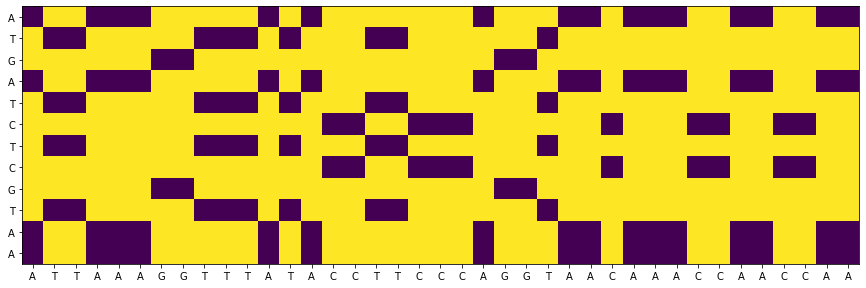

In [ ]:
plt.figure(figsize=(15, 15))
dotplotx(seq_1,seq_2)